# Bootstrp Estimates
- combining several models could help us get lower bias and lower variance at the same time
- Key tool we need first: bootstrapping
- resampling
- Fascinating result
    - same data
    - calculate the same thing several times
    - better results
- but first, let's look at bootstrap for simple parameter estimates like mean


## Bootstrp Estimates

- Given :X = {$x_{1},x_{2},...,x_{N}$}


- for b = 1...B:
    - $X_{b}$ = sample_with_replacement(X) # size of $X_{b}$ is N
    - sample_mean[b] = sum($X_{b}$)/N

- calculate mean and variance of {sample_mean[1],...,sample_mean[B]}
- big variance -> not confident about value of mean




- Given X = {1,2,3,4,5}
- I sample from this and I get 5
- I sample again, I can get 5 again
- In fact, it's possible to get {5,5,5,5,5}
- If I sampled without replacement, the only possible result is the original dataset

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

B = 5#200
N = 20
X = np.random.randn(N)

print("sample mean of X:", X.mean())

individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size=N)
    print(sample)
    individual_estimates[b] = sample.mean()
    
sample mean of X: -0.5706147702878009
[-0.38012851 -1.16344489 -2.46876863 -0.97304174 -0.87946     0.06087354
 -1.16344489 -0.60421335 -1.16344489 -0.37301198 -0.20605531 -0.16664872
  0.0470683  -0.87946     0.0470683   0.06087354 -0.38012851 -0.60421335
 -1.15876691 -2.46876863]
[-0.48300272  0.6894706  -1.15876691 -1.15876691  0.09769392 -2.46876863
  0.6894706  -0.48300272 -0.60421335  0.09769392 -1.55823206 -0.38012851
  0.6894706  -0.60421335 -0.14174115  0.16003414 -1.16344489 -0.60421335
 -1.15876691 -0.60421335]
[-0.48300272 -0.60421335 -0.48300272 -1.55823206  0.09769392 -0.60421335
 -0.16664872 -1.15876691 -0.84203215 -0.38012851 -0.60421335  0.16003414
  0.06087354  0.16003414  0.09769392 -0.16664872  0.06087354 -0.48300272
 -0.38012851 -0.48300272]
[ 0.09769392  0.16003414 -0.16664872 -0.14174115 -2.46876863 -0.97304174
 -0.14174115 -0.14174115  0.06087354 -0.37301198  0.6894706  -0.14174115
 -0.16664872  0.09769392 -0.60421335  0.06087354  0.09769392  0.09769392
  0.06087354 -0.37301198]
[-1.06888779 -0.97304174 -0.97304174 -1.16344489 -0.48300272 -1.55823206
  0.09769392 -1.15876691 -1.16344489 -1.16344489 -1.16344489 -0.20605531
 -1.06888779 -0.48300272 -1.16344489 -0.16664872 -0.60421335 -1.16344489
 -0.20605531 -1.55823206]
```    

## Result first
- Expected value of bootstrapped parameter is equal to the parameter

$$
E(\bar{\theta_{B}})= 0
$$

- Given 
$$
\varrho = corr(\hat{\theta_{i}},\hat{\theta_{j}}),var(\hat{\theta_{i}}) = \sigma^2
$$



- Then

$$
var(\bar{\theta_{B}}) = \frac{1-\varrho}{B}\sigma^2+ \varrho\sigma^2
$$

- If no correlation between each bootstrap sample,then variance of bootstrapped mean decreases with 1/B
- (But there probably will be correlation)

## Confidence Interval
- +1.96 = norm.cdf(0.975)
- -1.96 = norm.cdf(0.025)  

- 95%CI $\approx \bar{\theta_{B}} \pm 1.96std(\hat{\theta_{B}})$

## Derivation of variance
- $\bar{\theta_{B}}$ = sample mean of resampled sample means
- $\hat{\theta_{i}}$ = sample mean of bootstrap sample i 
- $\theta$ = original parameter we're trying to estimate

$$
E(\bar{\theta_{B}}) = E\bigg\{ \frac{1}{B}\sum_{i=1}^{B}\hat{\theta_{i}} \bigg\} = E\bigg\{ \frac{1}{B}(\hat{\theta_{1}} +...+ \hat{\theta_{B}}) \bigg\} = \frac{1}{B}BE(\hat{\theta})=0
$$

## Definitions

$$
E(\hat{\theta}) = \mu \\
var(\hat{\theta}) = E\bigg\{  (\hat{\theta}- \mu)^2 \bigg\} 
$$

- correlation -1~1

$$
\varrho = \frac{E\bigg\{ (\hat{\theta_{i}}-\mu)(\hat{\theta_{j}}-\mu) \bigg\}  }{\sigma^2} \\
S_{B} = \sum_{i=1}^{B}\hat{\theta_{i}}\\
\bar{\theta_{B}} = \frac{1}{B}S_{B}
$$


$$
var(\bar{\theta_{B}}) = E\bigg\{ (\frac{1}{B}S_{B}-\mu)^2 \bigg\}\\
var(\bar{\theta_{B}}) = \frac{1}{B^2}E\bigg\{ (S_{B}-\mu B)^2 \bigg\}\\
var(\bar{\theta_{B}}) = \frac{1}{B^2}E\bigg\{ (S_{B}^2-2\mu BS_{B}+\mu^2B^2) \bigg\}\\
var(\bar{\theta_{B}}) = \frac{1}{B^2}[E\bigg\{ S_{B}^2-\mu^2B^2 \bigg\}]\\
var(\bar{\theta_{B}}) = \frac{1}{B^2}E \bigg\{S_{B}^2\bigg\}-\mu^2\\
$$

$$
E\bigg\{ S_{B}^2\bigg\} = E\bigg\{ (\hat{\theta_{1}}+ \hat{\theta_{2}} +...+\hat{\theta_{n}})(\hat{\theta_{1}}+ \hat{\theta_{2}} +...+\hat{\theta_{n}})\bigg\} \\
E\bigg\{ S_{B}^2\bigg\} = BE\bigg\{ \hat{\theta_{i}}^2\bigg\} +B(B-1)E_{i\neq j}\bigg\{ \hat{\theta_{i}}\hat{\theta_{j}} \bigg\}
$$

$$
\sigma^2 = E\bigg\{  (\hat{\theta}- \mu^2)^2 \bigg\} = E\bigg\{ \hat{\theta_{i}^2} \bigg\} - \mu^2\\
E\bigg\{ \hat{\theta_{i}^2} \bigg\} =  \sigma^2 + \mu^2\\
\varrho = \frac{E\bigg\{ (\hat{\theta_{i}}-\mu)(\hat{\theta_{j}}-\mu) \bigg\}  }{\sigma^2} = \frac{E\bigg\{ \hat{\theta_{i}}\hat{\theta_{j}} \bigg\}-\mu^2}{\sigma^2} \\
E_{i\neq j}\bigg\{ \hat{\theta_{i}}\hat{\theta_{j}} \bigg\} = \varrho \sigma^2 + \mu^2
$$

## Derivation of variance 

$$
E\bigg\{ S_{B}^2 \bigg\} = B(\sigma^2+\mu^2) +B(B-1)(\varrho\sigma^2+\mu^2) \\
E\bigg\{ S_{B}^2 \bigg\} = B\sigma^2 +B(B-1)\varrho\sigma^2+\mu^2B^2 \\
var(\bar{\theta_{B}}) = \frac{1}{B^2} \bigg\{ B\sigma^2 +B(B-1)\varrho\sigma^2+\mu^2B^2 \bigg\}-\mu^2\\
var(\bar{\theta_{B}}) = \frac{1-\varrho}{B}\sigma^2+ \varrho\sigma^2
$$

## Variance analysis

- what if correlation is maximum? perfect correlation between bootstrap samples, $\varrho$ = 1
- we get back original variance(no improvement)

- if $\varrho$ = 0, no correlation at all, variance decreases with 1/B

$$
var(\bar{\theta_{B}}) = \frac{1-\varrho}{B}\sigma^2+ \varrho\sigma^2
$$

- Bootstrap mean for any linear model(of which the sample mean is an example) does not greatly improve variance of model.
- For linear statistics, it can be shown that $\varrho$ = N(2N-1) $\sim=$ 0.5
- __Biggest advantege occurs when we use highly nonlinear models like decision trees(will produce highly irregular decision boundaries that don't correlate with each other)__


## In Code

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

B = 200
N = 20
X = np.random.randn(N)

print("sample mean of X:", X.mean())
sample mean of X: 0.1563485073611091
    
X
array([ 1.74228429, -0.04356298,  0.04848791, -0.39078061, -0.27758132,
        0.37184104,  0.06961203, -0.36642179,  0.61395435,  0.09873261,
        0.52609411, -0.57723641,  0.68003934, -0.42755743,  0.6616516 ,
       -0.42244273, -0.79096184, -0.19334298,  1.16910683,  0.63505413])
```

```python
individual_estimates = np.empty(B)
for b in range(B):
  sample = np.random.choice(X, size=N)
  individual_estimates[b] = sample.mean()

individual_estimates.shape,individual_estimates[:3]
((200,), array([-0.29211586, -0.31854101, -0.21980161]))
```

```python
bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025)*bstd # norm.ppf(0.025) == -1.96
upper = bmean + norm.ppf(0.975)*bstd # norm.ppf(0.975) == +1.96
print("bmean {} bstd {} lower {} upper {}".format(bmean,bstd,lower,upper))


```

```python
# traditional way of calculating CI
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)
print("lower2 {} upper2 {}".format(lower2,upper2))
bmean 0.25295752347367423 bstd 0.25914871716971505 lower -0.2549646288187241 upper 0.7608796757660725
lower2 -0.2774090818636502 upper2 0.6923332456959128

```

```python
plt.hist(individual_estimates, bins=20)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95%% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95%% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95%% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95%% CI")
plt.legend()
plt.show()
```

sample mean of X: -0.3284607669221654
bmean -0.31485562477267365 bstd 0.19997345488080057 lower -0.7067963942030884 upper 0.07708514465774097
lower2 -0.700328727908021 upper2 0.043407194063690036


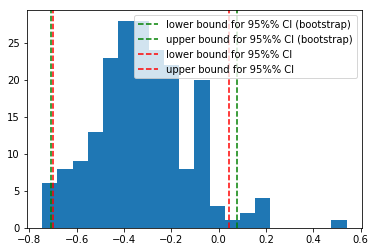

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

B = 200
N = 20
X = np.random.randn(N)

print("sample mean of X:", X.mean())

individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size=N)
    individual_estimates[b] = sample.mean()

bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025)*bstd # norm.ppf(0.025) == -1.96
upper = bmean + norm.ppf(0.975)*bstd # norm.ppf(0.975) == +1.96

print("bmean {} bstd {} lower {} upper {}".format(bmean,bstd,lower,upper))
# traditional way of calculating CI
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)
print("lower2 {} upper2 {}".format(lower2,upper2))
plt.hist(individual_estimates, bins=20)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95%% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95%% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95%% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95%% CI")
plt.legend()
plt.show()


# Bagging

- Bagging : bootstrap aggregation = application of bootstrap to ML models
- Looks exactly like bootstrapping except instead of calulating a $\hat{\theta}$ , we train a model instead

## Training

```python
models = []
for b = 1...B:
    model = Model()
    Xb,Yb = resample(X)
    model.fit(Xb,Yb)
    models.append(model)
```

## Prediction

Average if regression, vote if classification

```python
def predect(X):
    return np.mean([model.predict(X) for model in models],axis=1)

```

- classification is harder b/c we need to collect the votes, If classifier returns class probabilities, we can just use averaging

## Classification (Naive)

```python
def predict_one(X):
    votes = []
    for model in models:
        k = model.predict(X)
        votes[k]++
    argmax = 0, max = -inf
    for k,v in votes.iteritems():
        if v > max:
            argmax = k,max = v
    return k 

```

- another implementation

```python
def predict(X):
    output = np.zeros((N,K))
    for model in models:
        output[np.arange(N),model.predict(X)] += 1
    return output.argmax(axis=1)

```

# Bagging Regression Tree In Code

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

# create the data
T = 100
x_axis = np.linspace(0, 2*np.pi, T)
y_axis = np.sin(x_axis)

# get the training data
N = 30
idx = np.random.choice(T, size=N, replace=False)
Xtrain = x_axis[idx].reshape(N, 1)
Ytrain = y_axis[idx]


```

```python
# try a lone decision tree
model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
prediction = model.predict(x_axis.reshape(T, 1))
print("score for 1 tree:", model.score(x_axis.reshape(T, 1), y_axis))
```

```python
# plot the lone decision tree's predictions
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()
```

```python
# now try bagging
class BaggedTreeRegressor:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeRegressor()
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return predictions / self.B

  def score(self, X, Y):
    d1 = Y - self.predict(X)
    d2 = Y - Y.mean()
    return 1 - d1.dot(d1) / d2.dot(d2)

```

```python
model = BaggedTreeRegressor(200)
model.fit(Xtrain, Ytrain)
print("score for bagged tree:", model.score(x_axis.reshape(T, 1), y_axis))
prediction = model.predict(x_axis.reshape(T, 1))

```

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle


# create the data
T = 100
x_axis = np.linspace(0, 2*np.pi, T)
y_axis = np.sin(x_axis)

# get the training data
N = 30
idx = np.random.choice(T, size=N, replace=False)
Xtrain = x_axis[idx].reshape(N, 1)
Ytrain = y_axis[idx]


In [3]:
# try a lone decision tree
model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
prediction = model.predict(x_axis.reshape(T, 1))
print("score for 1 tree:", model.score(x_axis.reshape(T, 1), y_axis))


score for 1 tree: 0.98936053341364


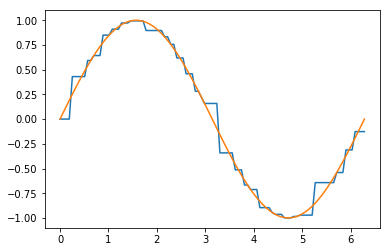

In [4]:
%matplotlib inline
# plot the lone decision tree's predictions
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()


In [5]:
# now try bagging
class BaggedTreeRegressor:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeRegressor()
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return predictions / self.B

  def score(self, X, Y):
    d1 = Y - self.predict(X)
    d2 = Y - Y.mean()
    return 1 - d1.dot(d1) / d2.dot(d2)



In [6]:
model = BaggedTreeRegressor(200)
model.fit(Xtrain, Ytrain)
print("score for bagged tree:", model.score(x_axis.reshape(T, 1), y_axis))
prediction = model.predict(x_axis.reshape(T, 1))



score for bagged tree: 0.9907960779309849


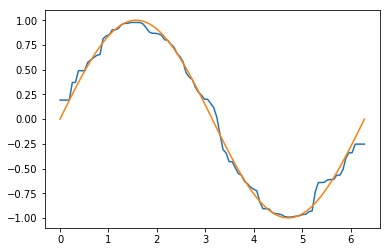

In [7]:
# plot the bagged regressor's predictions
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()


# Bagging Classification In Code

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
# from util import plot_decision_boundary

np.random.seed(10)

# create the data
N = 500
D = 2
X = np.random.randn(N, D)


In [10]:
X

array([[ 1.3315865 ,  0.71527897],
       [-1.54540029, -0.00838385],
       [ 0.62133597, -0.72008556],
       [ 0.26551159,  0.10854853],
       [ 0.00429143, -0.17460021],
       [ 0.43302619,  1.20303737],
       [-0.96506567,  1.02827408],
       [ 0.22863013,  0.44513761],
       [-1.13660221,  0.13513688],
       [ 1.484537  , -1.07980489],
       [-1.97772828, -1.7433723 ],
       [ 0.26607016,  2.38496733],
       [ 1.12369125,  1.67262221],
       [ 0.09914922,  1.39799638],
       [-0.27124799,  0.61320418],
       [-0.26731719, -0.54930901],
       [ 0.1327083 , -0.47614201],
       [ 1.30847308,  0.19501328],
       [ 0.40020999, -0.33763234],
       [ 1.25647226, -0.7319695 ],
       [ 0.66023155, -0.35087189],
       [-0.93943336, -0.48933722],
       [-0.80459114, -0.21269764],
       [-0.33914025,  0.31216994],
       [ 0.56515267, -0.14742026],
       [-0.02590534,  0.2890942 ],
       [-0.53987907,  0.70816002],
       [ 0.84222474,  0.2035808 ],
       [ 2.39470366,

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

def plot_decision_boundary(X, model):
  h = .02  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


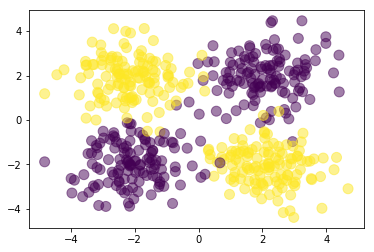

In [12]:
# 2 gaussians
# sep = 1.5
# X[:N/2] += np.array([sep, sep])
# X[N/2:] += np.array([-sep, -sep])
# Y = np.array([0]*(N/2) + [1]*(N/2))

# noisy XOR
sep = 2
X[:125] += np.array([sep, sep])
X[125:250] += np.array([sep, -sep])
X[250:375] += np.array([-sep, -sep])
X[375:] += np.array([-sep, sep])
Y = np.array([0]*125 + [1]*125 + [0]*125 + [1]*125)

# plot the data
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()


In [14]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

score for 1 tree: 1.0


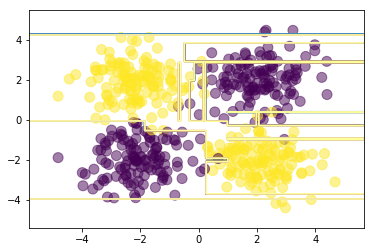

In [15]:
# lone decision tree
model = DecisionTreeClassifier()
model.fit(X, Y)
print("score for 1 tree:", model.score(X, Y))

# plot data with boundary
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()



score for bagged model: 0.952


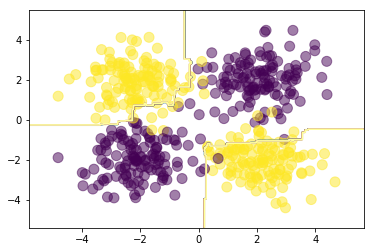

In [18]:
# create the bagged model
class BaggedTreeClassifier:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeClassifier(max_depth=2)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
#     print(X)
    # no need to keep a dictionary since we are doing binary classification
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return np.round(predictions / self.B)

  def score(self, X, Y):
    P = self.predict(X)
    return np.mean(Y == P)


model = BaggedTreeClassifier(200)
model.fit(X, Y)

print("score for bagged model:", model.score(X, Y))

# plot data with boundary
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plot_decision_boundary(X, model)
plt.show()



# Stacking

- Stacking: another way of combining models
- we've assumed so far that each model's influence must be equal
- How about weighting them

$$
f(x) = \sum_{m=1}^{M}w_{m}f_{m}(x)
$$

- stacking is not the only way to find these weights, we'll explore another later
- As usual,we want to minimize MSE

$$
\hat{w} = argmin_{w}E_{POP}[(Y-f(X))^2]\\
\hat{w} = argmin_{w}E_{POP}[(Y-\sum_{m=1}^{M}w_{m}f_{m}(x))^2]\\
$$

- look closely, this is just linear regression

$$
\hat{w} = E_{POP}[(F(X)^T F(X))^{-1} F(X)^T Y]
$$

- If $f_{m}(x)$ = linear regression with m inputs, then $f_{m}(x)$ is always the best
- so $w_{m}$ = 1,$w_{1}$ = ,,,=$w_{m}$ = 0

- instead, train on all points except($x_{i},y_{i}$),calculate error over every ith pair

$$
\hat{w}_{stack} = argmin_{m}\sum_{i=1}^{N}[y_{i}-\sum_{m=1}^{M}w_{m}f_{m}^{-i}(x)]^2
$$

- $f_{m}^{-i}(x)=m^{th}$ model trained on all data except ($x_{i},y_{i}$)